# Pre-processing

## Libraries

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Let's see how the data looks like

In [221]:
# Let's see how the data looks like
df = pd.read_csv(r"D:\DEPI\3- Preprocessing & Visualization\Dash project\KaggleV2-May-2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [222]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [223]:
"""  Observtions: 
      # Our focus here if there are something that needs mapping. We can ignore : [PatientId, AppointmentID, ScheduledDay, ScheduledTime, AppointmentDay, Age]:
        - We can map the column 'Gender' to :  Female(F) -> 0 , Male(M) -> 1
        - We can also map the column 'No-show' to :  No -> 0 , Yes -> 1
        - Neighbourhood column won't be mapped.
"""
pd.DataFrame(df.apply(lambda x: [x.unique(),x.unique().size], axis = 0)).T  # A DataFrame that contain the unique values and their number

,0,1
PatientId,"[29872500000000.0, 558998000000000.0, 42629600...",61744
AppointmentID,"[5642903, 5642503, 5642549, 5642828, 5642494, ...",110527
Gender,"[F, M]",2
ScheduledDay,"[2016-04-29T18:38:08Z, 2016-04-29T16:08:27Z, 2...",103549
AppointmentDay,"[2016-04-29T00:00:00Z, 2016-05-03T00:00:00Z, 2...",27
Age,"[62, 56, 8, 76, 23, 39, 21, 19, 30, 29, 22, 28...",104
Neighbourhood,"[JARDIM DA PENHA, MATA DA PRAIA, PONTAL DE CAM...",81
Scholarship,"[0, 1]",2
Hipertension,"[1, 0]",2
Diabetes,"[0, 1]",2


In [224]:
df['Gender'] = df['Gender'].map(lambda x: 1 if x == 'M' else 0)
df['No-show'] = df['No-show'].map(lambda x: 1 if x == 'Yes' else 0)

In [225]:
# We have 2 columns that contain dates which needs some adjustments
ScheduledDay = pd.to_datetime(df.ScheduledDay)
AppointmentDay = pd.to_datetime(df.AppointmentDay)

df.insert(value = ScheduledDay.dt.year, loc = 3, column = 'ScheduledYear')
df.insert(value = ScheduledDay.dt.month, loc = 4, column = 'ScheduledMonth')
df['ScheduledDay'] = ScheduledDay.dt.day

df.insert(value = ScheduledDay.dt.day_of_week, loc = 6, column = 'ScheduledDayofWeek')
df.insert(value = ScheduledDay.dt.time, loc = 7, column = 'Scheduled-Time')

# Note: All Appointments have the time 'T00:00:00Z' around all of the 110527 rows. So, I didn't create a column for AppointmentTime
# Note: The same goes for the Appointment year

df.insert(value = AppointmentDay.dt.month, loc = 8, column = 'AppointmentMonth')
df.insert(value = AppointmentDay.dt.day_of_week, loc = 10, column = 'AppointmentDayofWeek')
df['AppointmentDay'] = AppointmentDay.dt.day

df

,PatientId,AppointmentID,Gender,ScheduledYear,ScheduledMonth,ScheduledDay,ScheduledDayofWeek,Scheduled-Time,AppointmentMonth,AppointmentDay,AppointmentDayofWeek,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016,4,29,4,18:38:08,4,29,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,1,2016,4,29,4,16:08:27,4,29,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,0,2016,4,29,4,16:19:04,4,29,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,0,2016,4,29,4,17:29:31,4,29,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,0,2016,4,29,4,16:07:23,4,29,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016,5,3,1,09:15:35,6,7,1,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596270e+12,5650093,0,2016,5,3,1,07:27:33,6,7,1,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557660e+13,5630692,0,2016,4,27,2,16:03:52,6,7,1,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213490e+13,5630323,0,2016,4,27,2,15:09:23,6,7,1,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [226]:
df['ScheduledYear'].value_counts()
df.drop(index = df[df['ScheduledYear'] == 2015].index, inplace = True)
# Removed Schedules at 2015 (64 row)
df.drop(columns = 'ScheduledYear',inplace = True)
df

,PatientId,AppointmentID,Gender,ScheduledMonth,ScheduledDay,ScheduledDayofWeek,Scheduled-Time,AppointmentMonth,AppointmentDay,AppointmentDayofWeek,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,4,29,4,18:38:08,4,29,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,1,4,29,4,16:08:27,4,29,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,0,4,29,4,16:19:04,4,29,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,0,4,29,4,17:29:31,4,29,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,0,4,29,4,16:07:23,4,29,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,5,3,1,09:15:35,6,7,1,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596270e+12,5650093,0,5,3,1,07:27:33,6,7,1,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557660e+13,5630692,0,4,27,2,16:03:52,6,7,1,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213490e+13,5630323,0,4,27,2,15:09:23,6,7,1,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [227]:
# I think the difference between appointment and schedule dates may be benfecial

zz = pd.read_csv(r"D:\DEPI\3- Preprocessing & Visualization\Dash project\KaggleV2-May-2016.csv")
zz['AppointmentDay'] = zz['AppointmentDay'].apply(lambda x:  x[:10])
zz['ScheduledDay'] =  zz['ScheduledDay'].apply(lambda x:  x[:10])

zz['AppointmentDay'] = pd.to_datetime(zz['AppointmentDay'])
zz['ScheduledDay'] =  pd.to_datetime(zz['ScheduledDay'] )

zz['D'] = zz['AppointmentDay']  - zz['ScheduledDay']

df.insert(value = zz['D'], loc = 6, column = 'Difference')
df.drop(index = zz['D'][zz['D'].dt.days < 0].index, inplace = True)

df.sort_values('Difference')
df['Difference'] = df['Difference'].dt.days
del(zz)
df


,PatientId,AppointmentID,Gender,ScheduledMonth,ScheduledDay,ScheduledDayofWeek,Difference,Scheduled-Time,AppointmentMonth,AppointmentDay,AppointmentDayofWeek,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,4,29,4,0,18:38:08,4,29,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589980e+14,5642503,1,4,29,4,0,16:08:27,4,29,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262960e+12,5642549,0,4,29,4,0,16:19:04,4,29,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679510e+11,5642828,0,4,29,4,0,17:29:31,4,29,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841190e+12,5642494,0,4,29,4,0,16:07:23,4,29,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,5,3,1,35,09:15:35,6,7,1,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596270e+12,5650093,0,5,3,1,35,07:27:33,6,7,1,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557660e+13,5630692,0,4,27,2,41,16:03:52,6,7,1,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213490e+13,5630323,0,4,27,2,41,15:09:23,6,7,1,38,MARIA ORTIZ,0,0,0,0,0,1,0


## Let's see if there are wrong values to remove or imputate

In [228]:
# 1. PatientId
print('Patient ID min,max',end = ' :')
print(df.iloc[:,0].min(), df.iloc[:,0].max())
"""  Observtions: 
     - No negative or equal zero values.
    -----> This column seems fine
"""

Patient ID min,max :39200.0 999982000000000.0


'  Observtions: \n     - No negative or equal zero values.\n    -----> This column seems fine\n'

In [229]:
# 2. AppointmentID
print('AppointmentID')
print(df.iloc[:,1].value_counts().unique())
print(df.iloc[:,1].min(), df.iloc[:,1].max())

"""  Observtions: 
     - No repeated Values.
     - No negative or equal zero values.
    -----> This column seems fine
"""

AppointmentID
[1]
5209081 5790484


'  Observtions: \n     - No repeated Values.\n     - No negative or equal zero values.\n    -----> This column seems fine\n'

In [230]:
# 3. Gender
print(df.iloc[:,2].value_counts(), df.iloc[:,2].value_counts().sum(), sep = '\nSum = ')
"""  Observtions: 
    -----> This column seems fine
"""

Gender
0    71792
1    38668
Name: count, dtype: int64
Sum = 110460


'  Observtions: \n    -----> This column seems fine\n'

In [231]:
# 4. ScheduledYear
print(df.iloc[:,3].value_counts())
"""  Observtions: 
     - No negative or equal zero values.
    -----> This column seems fine
"""

ScheduledMonth
5    67416
4    25339
6    13750
3     3614
2      281
1       60
Name: count, dtype: int64


'  Observtions: \n     - No negative or equal zero values.\n    -----> This column seems fine\n'

In [232]:
# 5. ScheduledMonth
print(df.iloc[:,4].value_counts().sort_index(ascending = True))
"""  Observtions: 
     - No Wrong / Out of range {1-12} values.
    -----> This column seems fine
"""

ScheduledDay
1     3916
2     7160
3     6845
4     3675
5     4901
6     6415
7     2497
8     2090
9     4029
10    4098
11    4381
12    4111
13    3823
14     841
15    1543
16    4269
17    3627
18    4938
19    4387
20    5061
21     141
22     226
23     233
24    3451
25    5055
26    2466
27    2331
28    2938
29    4144
30    3719
31    3149
Name: count, dtype: int64


'  Observtions: \n     - No Wrong / Out of range {1-12} values.\n    -----> This column seems fine\n'

In [233]:
# 6. ScheduleDay
print(df.iloc[:,5].value_counts().sort_index(ascending = True))
"""  Observtions: 
     - No Wrong / Out of range {1-31} values.
    -----> This column seems fine
"""

ScheduledDayofWeek
0    23069
1    26122
2    24259
3    18071
4    18915
5       24
Name: count, dtype: int64


'  Observtions: \n     - No Wrong / Out of range {1-31} values.\n    -----> This column seems fine\n'

In [234]:
# 7. Scheduled-Time
print(df.iloc[:,6].value_counts().sort_index(ascending = True))
"""  Observtions: 
     - No Wrong / Out of range {1-23} values.
    -----> This column seems fine
"""

Difference
0      38563
1       5213
2       6725
3       2737
4       5290
       ...  
132        1
133       11
139        1
142        2
146        1
Name: count, Length: 123, dtype: int64


'  Observtions: \n     - No Wrong / Out of range {1-23} values.\n    -----> This column seems fine\n'

In [235]:
# 8 ScheduledDayofWeek
"""  Observtions: 
    -----> This column seems fine
"""

'  Observtions: \n    -----> This column seems fine\n'

In [236]:
# 9. Difference
"""  Observtions: 
    -----> This column seems fine
"""

'  Observtions: \n    -----> This column seems fine\n'

In [237]:
# 9.AppointmentMonth
print(df.iloc[:,8].value_counts().sort_index(ascending = True))
"""  Observtions: 
     - No Wrong / Out of range {1-12} values.
    -----> This column seems fine
"""

AppointmentMonth
4     3235
5    80799
6    26426
Name: count, dtype: int64


'  Observtions: \n     - No Wrong / Out of range {1-12} values.\n    -----> This column seems fine\n'

In [238]:
# 10.AppointmentDay
print(df.iloc[:,9].value_counts().sort_index(ascending = True))
"""  Observtions: 
     - No Wrong / Out of range {1-31} values.
    -----> This column seems fine
"""

AppointmentDay
1     4456
2     8685
3     8335
4     4160
5     4272
6     8571
7     4416
8     4472
9     4519
10    4308
11    4464
12    4394
13    3987
14      39
16    4613
17    4371
18    4362
19    4270
20    3828
24    4009
25    3901
29    3235
30    4514
31    4279
Name: count, dtype: int64


'  Observtions: \n     - No Wrong / Out of range {1-31} values.\n    -----> This column seems fine\n'

In [239]:
# 11.Age
print(df.iloc[:,10].value_counts().sort_index(ascending = True))
print(df[df['Age'] < 1])
"""  Observtions: 
     - This column contains some ambiuous values {-1, 0}
     -----> We should remove rows with age = -1
     -----> rows with age = 0  means babies how are less than 1 yr. So, We will keep them
"""
df.drop(inplace = True, index = df[df['Age'] == -1].index)

AppointmentDayofWeek
0    22713
1    25638
2    25815
3    17246
4    19009
5       39
Name: count, dtype: int64
           PatientId  AppointmentID  Gender  ScheduledMonth  ScheduledDay  \
59      7.184430e+13        5638545       0               4            29   
63      2.366230e+14        5628286       1               4            27   
64      1.885170e+14        5616082       1               4            25   
65      2.718820e+14        5628321       1               4            27   
67      8.647130e+13        5639264       0               4            29   
...              ...            ...     ...             ...           ...   
110345  1.473950e+14        5702537       0               5            16   
110346  5.577530e+12        5777724       1               6             6   
110454  6.142460e+11        5772400       0               6             3   
110460  4.321850e+13        5769545       0               6             3   
110507  4.769460e+14        5786918     

In [240]:
# The Rest are also fine
df.to_csv(r'modified.csv')

# Visualization

### What affects "No-show" ??

In [241]:
# Gender ?? 
gender_groups = df.groupby('No-show')['Gender'].value_counts().reset_index()
total_f = gender_groups['count'][gender_groups['Gender'] == 0].sum()
total_m = gender_groups['count'][gender_groups['Gender'] == 1].sum()

gender_groups[r'%OutOfGender'] = gender_groups.apply(lambda x : (x['count']/total_f)*100 if x['Gender'] == 0 else (x['count']/total_m)*100, axis = 1)
fig1 = px.bar(x = ['Female', 'Male', 'Female', 'Male'], y = gender_groups['count'], color = ['Attend', 'Attend', "Didn't attend", "Didn't attend"], hover_name = ['Attend', 'Attend', "Didn't attend", "Didn't attend"], hover_data = {'%OutOfGender' : gender_groups['%OutOfGender'].values})
fig1.update_layout(
    title = "Number of pepole attended/not grouped by their gender",
    xaxis_title="Gender",
    yaxis_title="Attendenance"
)


In [242]:
# Months ??
month_gp = df.groupby('ScheduledMonth')['No-show'].value_counts().reset_index()
fig2 = px.bar(x = month_gp['ScheduledMonth'], y = month_gp['count'], color = month_gp['No-show'], color_continuous_scale = 'Viridis')
fig2.update_layout(
    title = "Number of pepole attended/not grouped by ScheduledMonth",
    xaxis_title="Months",
    yaxis_title="Count"
)

In [243]:
# Months ??
month_gp = df.groupby('AppointmentMonth')['No-show'].value_counts().reset_index()
fig22 = px.bar(x = month_gp['AppointmentMonth'], y = month_gp['count'], color = month_gp['No-show'], color_continuous_scale = 'Viridis')
fig22.update_layout(
    title = "Number of pepole attended/not grouped by AppointmentMonth",
    xaxis_title="Months",
    yaxis_title="Count"
)

In [244]:
# Age ??
age_group = df.groupby('Age')['No-show'].value_counts().reset_index()
fig3 = px.line(x = age_group['Age'], y = age_group['count'], facet_col = age_group['No-show'].apply(lambda x : "Attended" if x == 0 else "Didn't"))
fig3.update_layout(
    title = "Number of pepole attended/not grouped by their age",
    xaxis_title="Age",
    yaxis_title="Count",

)

In [245]:
# Neighbourhood ??
Neighbourhood_gp = df.groupby('Neighbourhood')['No-show'].value_counts().sort_values().reset_index()
#Neighbourhood_gp['No-show'].apply(lambda x : "Attended" if x == 0 else "Didn't")  Neighbourhood_gp['Neighbourhood']
fig4 = px.bar(x = Neighbourhood_gp['Neighbourhood'], y = Neighbourhood_gp['count'], color = Neighbourhood_gp['Neighbourhood'])
fig4.update_layout(
    xaxis=dict(
        dtick=2  # This will show every tick label (for step size of 1)
    ),
    title = "Number of pepole attended/not grouped by their Neighbourhood",
    xaxis_title="Neighbourhood",
    yaxis_title="No-show"
)

In [246]:
"""east_region = [
    'Ilha do Frade', 'Ilha do Boí', 'Ilhas Oceânicas de Trindade', 'Pontal de Camburi',
    'Jardim Camburi', 'Jardim da Penha', 'Mata da Praia', 'Praia do Canto', 'Praia do Suá',
    'Bonfim', 'Santo André', 'Santos Dumont', 'Santo Antônio', 'Santa Tereza', 'Centro'
]

west_region = [
    'Bento Ferreira', 'Santos Reis', 'Caratoíra', 'Andorinhas', 'Jardim da Penha',
    'Ponte da Penha', 'Solon Borges', 'Tabuazeiro', 'Maruípe', 'Santa Marta', 'Santa Helena',
    'Conquista', 'Grande Vitória', 'Monte Belo', 'Mário Cypreste'
]

south_region = [
    'Vila Rubim', 'Jardim Camburi', 'Maria Ortiz', 'Santa Lúcia', 'Santa Clara',
    'Santos Dumont', 'Santo André', 'Santo Antônio', 'Cruzamento'
]

north_region = [
    'Gurigica', 'Morada de Camburi', 'Mata da Praia', 'República', 'Jucutuquara', 'Santo Antônio',
    'Andorinhas'
]


"""

# day of week ??
day_of_week_gp = df.groupby('ScheduledDayofWeek')['No-show'].value_counts().reset_index()
fig5 = px.bar(x = day_of_week_gp['ScheduledDayofWeek'], y = day_of_week_gp['count'], facet_col = day_of_week_gp['No-show'].apply(lambda x : "Attended" if x == 0 else "Didn't"), color = day_of_week_gp['ScheduledDayofWeek'].map({0: 'Monday', 1: 'Tuesday',
2: 'Wednesday', 3: 'Thursday',
4: 'Friday', 6: 'Sunday'}))

fig5.update_layout(
    title = "Number of pepole attended/not grouped by the day of the week",
    xaxis_title="Day of week number",
    yaxis_title="Count",

)

<Axes: >

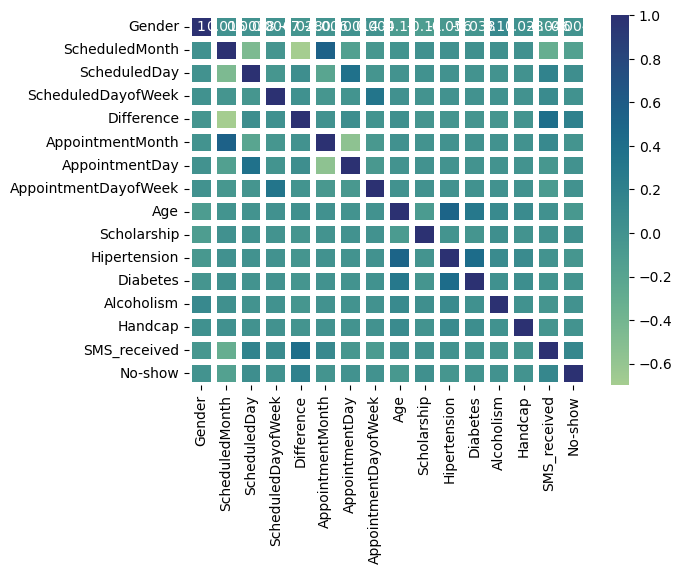

In [247]:
cor = df.drop(columns = ['Neighbourhood', 'PatientId', 'Scheduled-Time', 'AppointmentID'])
cor = cor.corr()
sns.heatmap(cor, annot=True, linewidths=4, cmap='crest')

In [248]:
figures = [fig1,fig2,fig3,fig4,fig5]

In [249]:
by_difference = df.groupby('Difference')['No-show'].value_counts().reset_index().sort_values('Difference')
by_difference['Difference'] = by_difference['Difference']
px.line(by_difference,x = 'Difference', y = 'count', facet_col = by_difference['No-show'].apply(lambda x : "Attended" if x == 0 else "Didn't"))